<a href="https://colab.research.google.com/github/Chaithra12237/Program/blob/master/vgg99ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

     |████████████████████████████████| 462 kB 4.1 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [ ]:
train_datagen = ImageDataGenerator(zoom_range = 0.5, shear_range = 0.3, horizontal_flip = True, preprocessing_function= preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function= preprocess_input)

In [ ]:
train = train_datagen.flow_from_directory(directory= "/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train", target_size = (256,256),batch_size = 32)
val = val_datagen.flow_from_directory(directory= "/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/valid", target_size = (256,256),batch_size = 32)

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [ ]:
t_img, label = train.next()

In [ ]:
t_img.shape

(32, 256, 256, 3)

In [ ]:
def plotImage(img_arr, label):
  for im, l in zip(img_arr, label):
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


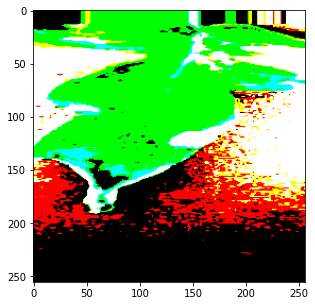

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


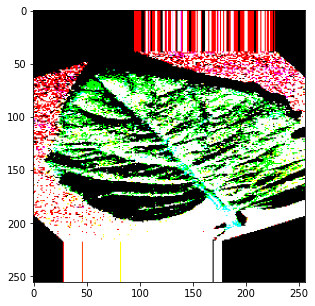

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


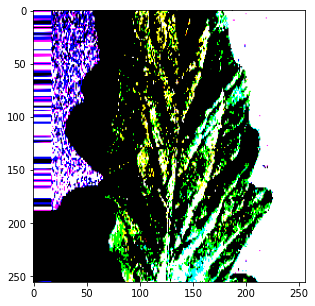

In [ ]:
plotImage(t_img[:3],label[:3])

In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [ ]:
base_model = VGG19(input_shape=(256,256,3), include_top = False)

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [14]:
x = Flatten()(base_model.output)
x= Dense(units = 10,activation= 'softmax')(x)
model = Model(base_model.input,x)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [18]:
model.compile(
  optimizer='adam',
  loss = keras.losses.categorical_crossentropy,
  metrics=['accuracy']
)

In [19]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
es = EarlyStopping(monitor= 'val_accuracy', min_delta = 0.01, patience = 3, verbose = 1)
mc = ModelCheckpoint(filepath="best_model.h5", 
                     monitor= 'val_accuracy', 
                     min_delta = 0.01, 
                     patience = 3, 
                     verbose = 1, 
                     save_best_only=True)
cb= [es,mc]

In [20]:
his = model.fit_generator(train, 
                          steps_per_epoch= 16, 
                          epochs = 15, 
                          verbose = 1, 
                          callbacks = cb, 
                          validation_data= val, 
                          validation_steps= 16, )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/15
16/16 [==============================] - ETA: 0s - loss: 15.0169 - accuracy: 0.2617 
Epoch 1: val_accuracy improved from -inf to 0.50781, saving model to best_model.h5
16/16 [==============================] - 532s 33s/step - loss: 15.0169 - accuracy: 0.2617 - val_loss: 11.0891 - val_accuracy: 0.5078
Epoch 2/15
16/16 [==============================] - ETA: 0s - loss: 9.3966 - accuracy: 0.5337 
Epoch 2: val_accuracy improved from 0.50781 to 0.63281, saving model to best_model.h5
16/16 [==============================] - 484s 31s/step - loss: 9.3966 - accuracy: 0.5337 - val_loss: 6.9211 - val_accuracy: 0.6328
Epoch 3/15
16/16 [==============================] - ETA: 0s - loss: 7.0436 - accuracy: 0.6641 
Epoch 3: val_accuracy improved from 0.63281 to 0.66797, saving model to best_model.h5
16/16 [==============================] - 457s 29s/step - loss: 7.0436 - accuracy: 0.6641 - val_loss: 7.5875 - val_accuracy: 0.6680
Epoch 4/15
16/16 [==============================] - ETA: 0s - lo

In [21]:
h= his.history
h.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

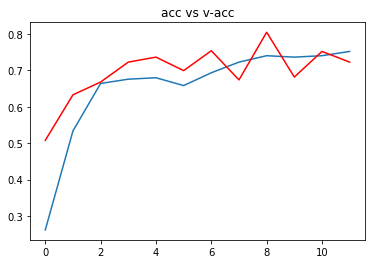

In [22]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c="red")
plt.title("acc vs v-acc")
plt.show()

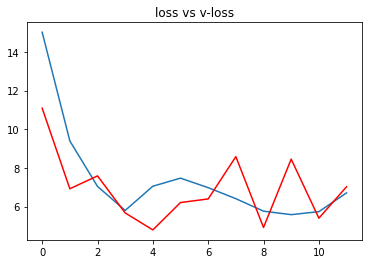

In [23]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c="red")
plt.title("loss vs v-loss")
plt.show()

In [24]:
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [25]:
acc= model.evaluate_generator(val)[1]
print(f"The accuracy of model is = {acc*100} %")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


The accuracy of model is = 76.37949585914612 %


In [26]:
ref = dict(zip(list(train.class_indices.values()), list(train.class_indices.keys())))

In [27]:
def prediction(path):
  img = load_img(path, target_size= (256,256))
  i = img_to_array(img)
  im = preprocess_input(i)
  img = np.expand_dims(im, axis = 0)
  pred = np.argmax(model.predict(img))
  print(f" The image belongs to { ref[pred] }")

In [34]:
path ="/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/valid/Tomato___Spider_mites Two-spotted_spider_mite/00fa99e8-2605-4d72-be69-98277587d84b___Com.G_SpM_FL 1453_flipTB.JPG"
prediction(path)

 The image belongs to Tomato___Spider_mites Two-spotted_spider_mite
